In [1]:
# Demo recsys boolean (0-1)

# import libraries


%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from operator import itemgetter
import plotly.plotly as py
import cufflinks as cf
cf.go_offline()

In [2]:
# names and tags

names=['id__'+str(i) for i in range(3000)]

tags=['r&b', 'rock', 'jazz', 'electronic', 'pop', 'indie',
      'cinema', 'theater', 'beers', 'wine', 'party', 'trips',
      'running', 'gym', 'golf', 'basket', 'football', 'yoga']


sub_tags_elec=['techno', 'electro_funky', 'house', 'minimal', 'dubstep', 'DandB']

In [3]:
# synth data

data=np.random.randint(0, 2, (len(names), len(tags)))*0.8
sub_data=np.random.randint(0, 1, (len(names), len(sub_tags_elec)))

s_data=pd.DataFrame(data, columns=tags, index=names)
s_sub_data=pd.DataFrame(sub_data, columns=sub_tags_elec, index=names)

s_data=pd.concat([s_data, s_sub_data], axis=1)

s_data['plan']=np.random.randint(0, 2, (len(names), 1))
s_data['id']=[i for i in range(len(names))]


for i in range(len(s_data)):
    if s_data.electronic[i]!=0:
        s_data.techno[i]=np.random.randint(0, 2)
        s_data.electro_funky[i]=np.random.randint(0, 2)
        s_data.house[i]=np.random.randint(0, 2)
        s_data.minimal[i]=np.random.randint(0, 2)
        s_data.dubstep[i]=np.random.randint(0, 2)
        s_data.DandB[i]=np.random.randint(0, 2)

In [4]:
#  weighing

for e in tags:
    s_data[e]=s_data[e]*2/3

for e in sub_tags_elec:
    s_data[e]=s_data[e]*1/3
    
display(s_data.tail())

,r&b,rock,jazz,electronic,pop,indie,cinema,theater,beers,wine,...,football,yoga,techno,electro_funky,house,minimal,dubstep,DandB,plan,id
id__2995,0.533333,0.000000,0.533333,0.533333,0.533333,0.533333,0.533333,0.000000,0.000000,0.533333,...,0.000000,0.533333,0.000000,0.0,0.333333,0.333333,0.000000,0.0,0,2995
id__2996,0.533333,0.533333,0.000000,0.533333,0.000000,0.533333,0.533333,0.000000,0.000000,0.000000,...,0.533333,0.000000,0.333333,0.0,0.000000,0.333333,0.333333,0.0,0,2996
id__2997,0.533333,0.000000,0.533333,0.000000,0.533333,0.000000,0.000000,0.533333,0.533333,0.000000,...,0.533333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0,2997
id__2998,0.533333,0.533333,0.000000,0.000000,0.533333,0.000000,0.533333,0.000000,0.533333,0.000000,...,0.533333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1,2998
id__2999,0.533333,0.533333,0.000000,0.000000,0.533333,0.000000,0.533333,0.000000,0.533333,0.000000,...,0.533333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0,2999


In [5]:
# new user function


def new_user(df, rb, rock, jazz, electronic, pop, indie, cinema, theater, beers, wine,
             party, trips, running, gym, golf, basket, football, yoga,
             techno, electro_funky, house, minimal, dubstep, DandB, metric):
    
    
    tags=['r&b', 'rock', 'jazz', 'electronic', 'pop', 'indie',
          'cinema', 'theater', 'beers', 'wine', 'party', 'trips',
          'running', 'gym', 'golf', 'basket', 'football', 'yoga',
          'techno', 'electro_funky', 'house', 'minimal', 'dubstep', 'DandB']
    
    
    
    rating=[rb, rock, jazz, electronic, pop, indie, cinema, theater, beers, wine,
            party, trips, running, gym, golf, basket, football, yoga, 
            techno, electro_funky, house, minimal, dubstep, DandB]
    
    
    n_user={k:v for k, v in list(zip(tags, rating))}
    n_user['id']=len(s_data.id)
    n_user['plan']=0
    
    names=list(df.index)
    df=df.append(n_user, ignore_index=True)
    names.append(n_user['id'])
    df.index=names
    
    similar = pd.DataFrame(0.8/(1 + squareform(pdist(df.iloc[:, :-2], metric))), 
                         index=df.index, columns=df.index)

    similarities = similar[n_user['id']].sort_values(ascending=False)
    
    closer_users=[]
    for e in similarities.index:
        if df.ix[e].plan==1:
            closer_users.append(e)
    
    return list(map(list, zip(closer_users[:10], similarities.ix[closer_users[:10]])))#df.ix[closer_users[:10]][['id', 'plan']]

In [6]:
print('Rate r&b :')
rb = int(input())*1.6/3

Rate r&b :
1


In [7]:
print('Rate rock :')
rock = int(input())*1.6/3  

Rate rock :
1


In [8]:
print('Rate jazz :')
jazz = int(input())*1.6/3 

Rate jazz :
0


In [9]:
print('Rate electronic :')
electronic = int(input())*1.6/3  

Rate electronic :
1


In [10]:
if electronic!=0:
    print('Rate techno :')
    techno = int(input())*0.8/3
    
    print('Rate electro-funky :')
    electro_funky = int(input())*0.8/3
 
    print('Rate house :')
    house = int(input())*0.8/3
 
    print('Rate minimal :')
    minimal = int(input())*0.8/3
 
    print('Rate dubstep :')
    dubstep = int(input())*0.8/3
 
    print('Rate D&B :')
    DandB = int(input())*0.8/3


else:
    techno = 0
    electro_funky = 0
    house = 0
    minimal = 0
    dubstep = 0
    DandB = 0

Rate techno :
1
Rate electro-funky :
1
Rate house :
1
Rate minimal :
0
Rate dubstep :
0
Rate D&B :
0


In [11]:
print('Rate pop from :')
pop = int(input())*1.6/3 

Rate pop from :
1


In [12]:
print('Rate indie :')
indie = int(input())*1.6/3 

Rate indie :
0


In [13]:
print('Rate cinema :')
cinema = int(input())*1.6/3 

Rate cinema :
1


In [14]:
print('Rate theater :')
theater = int(input())*1.6/3 

Rate theater :
0


In [15]:
print('Rate beers :')
beers = int(input())*1.6/3 

Rate beers :
1


In [16]:
print('Rate wine :')
wine = int(input())*1.6/3 

Rate wine :
0


In [17]:
print('Rate party :')
party = int(input())*1.6/3 

Rate party :
1


In [18]:
print('Rate trips :')
trips = int(input())*1.6/3 

Rate trips :
0


In [19]:
print('Rate running :')
running = int(input())*1.6/3 

Rate running :
1


In [20]:
print('Rate gym :')
gym = int(input())*1.6/3 

Rate gym :
0


In [21]:
print('Rate golf :')
golf = int(input())*1.6/3 

Rate golf :
1


In [22]:
print('Rate basket :')
basket = int(input())*1.6/3 

Rate basket :
0


In [23]:
print('Rate football :')
football = int(input())*1.6/3 

Rate football :
1


In [24]:
print('Rate yoga :')
yoga = int(input())*1.6/3 

Rate yoga :
0


In [25]:
# metrics for squareform

'''
'euclidean', 'minkowski', 'cityblock', 'seuclidean', 'sqeuclidean', 'cosine', 'correlation'

'hamming', 'jaccard', 'chebyshev', 'canberra', 'braycurtis', 'mahalanobis', 'yule'

'matching', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener'

'sokalsneath', 'wminkowski'
'''


metric='cosine' 

In [26]:
# plans (users)

plans=new_user(s_data, rb, rock, jazz, electronic, pop, indie, cinema, theater, beers, wine,
               party, trips, running, gym, golf, basket, football, yoga, 
               techno, electro_funky, house, minimal, dubstep, DandB, metric)


print ('Similar users with plan : ')
for e in plans:
    print (e[0])
    
final=pd.DataFrame()
final['plan_ori_id']=[e[0] for e in plans]
final['original_similarity']=[e[1] for e in plans]

Similar users with plan : 
id__1433
id__1873
id__2909
id__1794
id__113
id__499
id__1629
id__356
id__271
id__2278


In [27]:
# follow-unfollow users
foll=plans
def follow(_id, b, foll):
    if b==0: return foll
    elif b==1:
        for e in foll:
            if _id==e[0]:
                e[1]+=e[1]*0.15
        for e in foll:
            if e[1]>1:e[1]=1
        return foll#sorted(foll, key=itemgetter(1), reverse=True)

print ()
for e in foll:
    print ('Follow user {}?'.format(e[0]))
    b=int(input())
    f=follow(e[0], b, foll)
    #print (f)
    print()
#final['follow_id']=[e[0] for e in f]
final['after_follow_similarity']=[e[1] for e in f]




Follow user id__1433?
1

Follow user id__1873?
1

Follow user id__2909?
1

Follow user id__1794?
0

Follow user id__113?
0

Follow user id__499?
0

Follow user id__1629?
0

Follow user id__356?
0

Follow user id__271?
0

Follow user id__2278?
0



In [28]:
w_likes=foll
def like(_id, b, serie_like):
    if b==0: return serie_like
    elif b==1:
        for e in serie_like:
            if _id==e[0]:
                e[1]+=0.01
        for e in serie_like:
            if e[1]>1:e[1]=1
        return serie_like

print ()
for e in w_likes:
    print ('Do you like the user {} plan?'.format(e[0]))
    b=int(input())
    l=like(e[0], b, w_likes)
    print()
final['with likes after follow']=[e[1] for e in f]


Do you like the user id__1433 plan?
1

Do you like the user id__1873 plan?
1

Do you like the user id__2909 plan?
1

Do you like the user id__1794 plan?
1

Do you like the user id__113 plan?
0

Do you like the user id__499 plan?
0

Do you like the user id__1629 plan?
0

Do you like the user id__356 plan?
0

Do you like the user id__271 plan?
0

Do you like the user id__2278 plan?
0



In [29]:
unfoll=w_likes
def unfollow(_id, b, unfoll):
    if b==0: return unfoll
    elif b==1:
        for e in unfoll:
            if _id==e[0]:
                e[1]-=e[1]*0.15
        for e in unfoll:
            if e[1]<0:e[1]=0
        return unfoll#sorted(unfoll, key=itemgetter(1), reverse=True)

print ()
for e in unfoll:
    print ('Unfollow user {}?'.format(e[0]))
    b=int(input())
    u=unfollow(e[0], b, unfoll)
    #print (u)
    print()
#final['unfollow_id']=[e[0] for e in u]
final['after_unfollow_similarity']=[e[1] for e in u]
display (final)


Unfollow user id__1433?
1

Unfollow user id__1873?
1

Unfollow user id__2909?
1

Unfollow user id__1794?
1

Unfollow user id__113?
1

Unfollow user id__499?
1

Unfollow user id__1629?
0

Unfollow user id__356?
0

Unfollow user id__271?
0

Unfollow user id__2278?
0



,plan_ori_id,original_similarity,after_follow_similarity,with likes after follow,after_unfollow_similarity
0,id__1433,0.757665,0.871314,0.881314,0.749117
1,id__1873,0.704860,0.810589,0.820589,0.697501
2,id__2909,0.698773,0.803588,0.813588,0.691550
3,id__1794,0.688908,0.688908,0.698908,0.594072
4,id__113,0.682301,0.682301,0.682301,0.579956
5,id__499,0.682205,0.682205,0.682205,0.579875
6,id__1629,0.661580,0.661580,0.661580,0.661580
7,id__356,0.660308,0.660308,0.660308,0.660308
8,id__271,0.659258,0.659258,0.659258,0.659258
9,id__2278,0.658918,0.658918,0.658918,0.658918


In [30]:
w_likes_un=unfoll
def like_un(_id, b, serie_like):
    if b==0: return serie_like
    elif b==1:
        for e in serie_like:
            if _id==e[0]:
                e[1]+=0.01
        for e in serie_like:
            if e[1]>1:e[1]=1
        return serie_like

print ()
for e in w_likes_un:
    print ('Do you like the user {} plan?'.format(e[0]))
    b=int(input())
    l=like_un(e[0], b, w_likes_un)
    print()
final['with likes after unfollow']=[e[1] for e in f]


Do you like the user id__1433 plan?
1

Do you like the user id__1873 plan?
0

Do you like the user id__2909 plan?
1

Do you like the user id__1794 plan?
1

Do you like the user id__113 plan?
0

Do you like the user id__499 plan?
1

Do you like the user id__1629 plan?
0

Do you like the user id__356 plan?
1

Do you like the user id__271 plan?
0

Do you like the user id__2278 plan?
0



In [31]:
final.iplot(kind='bar', x='plan_ori_id', title='Similarities with user id_3000', 
            yTitle='Similarity', xTitle='Users')

In [32]:
#final.head()

In [33]:
end_similarity=final.sort_values(by=['with likes after unfollow'], ascending=False)
#end_similarity

In [34]:
end_similarity.iplot(kind='bar', x='plan_ori_id', title='Final similarities with user id_3000', 
            yTitle='Similarity', xTitle='Users')

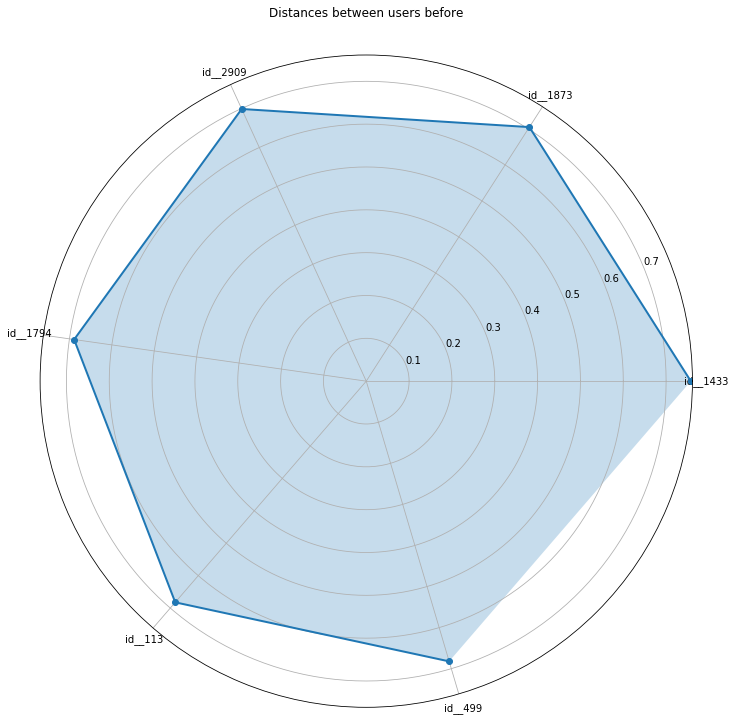

In [35]:
fig=plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, polar=True)
ax.plot(final['plan_ori_id'].head(6), final['original_similarity'].head(6), 'o-', linewidth=2)
ax.fill(final['plan_ori_id'].head(6), final['original_similarity'].head(6), alpha=0.25)
ax.set_title('Distances between users before')
ax.grid(True)

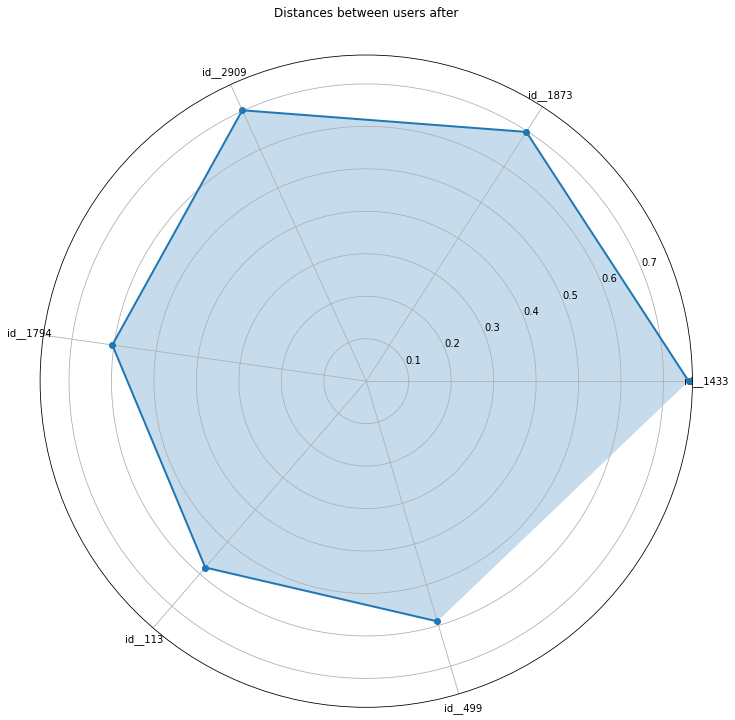

In [36]:
fig=plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, polar=True)
ax.plot(final['plan_ori_id'].head(6), final['with likes after unfollow'].head(6), 'o-', linewidth=2)
ax.fill(final['plan_ori_id'].head(6), final['with likes after unfollow'].head(6), alpha=0.25)
ax.set_title('Distances between users after')
ax.grid(True)